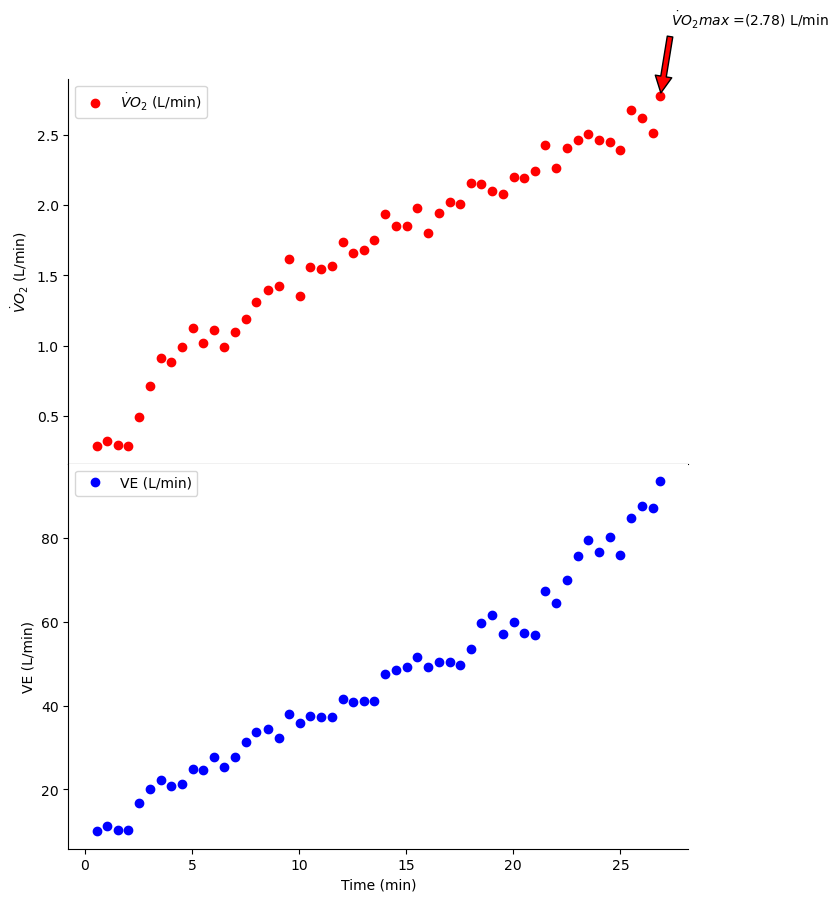

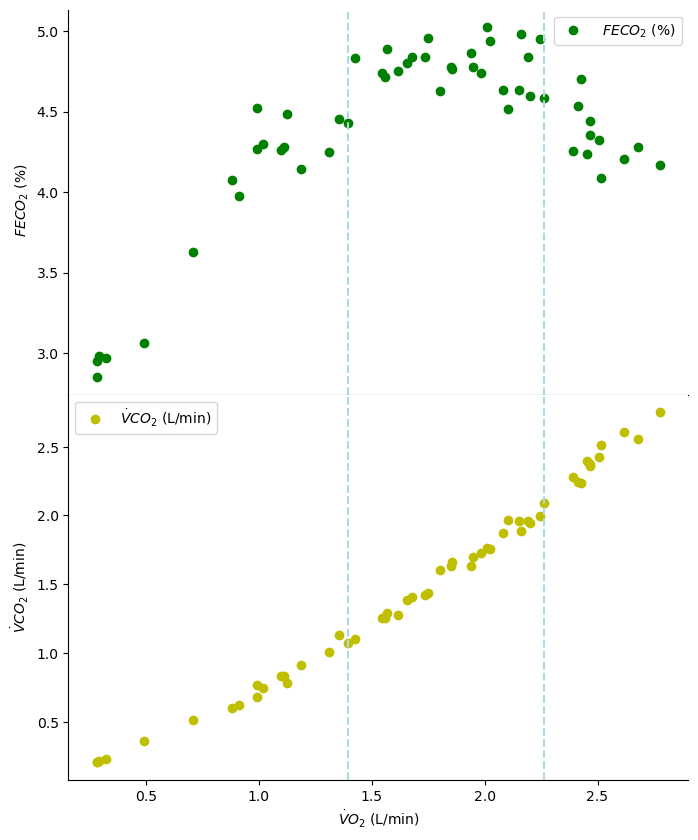

In [1]:
### Now all together in one code block that could run independently...
# lets take care of importing everything we need at once

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Lets read in our file now
df = pd.read_csv('../input/demo-knes381/subject_1321.csv', header=[0], skiprows=[1,2,3])

# please note that while this is an output file from the parvo-metabolics cart we have
# I have edited this data set and simplied the header file on it

# rename our column headers
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

# simplify our terms to reduce future typing... 
# it is easier to write plot x, y than plot df['Time'], df['VO2']
x_list = [df['TIME'],df['VO2']]
y_list = [df['VO2'],df['VE'],df['FECO2'],df['VCO2']]

#Find VO2 max value 
ymax = max(y_list[0])

# find the x position of the ymax value or where ymax occurs on the x axis
xmax = x_list[0][y_list[0].argmax()]

# Defining Threshold Lines
GET_x = x_list[1][int(len(x_list[1]) * 0.3)]  # Example: 30% into the test
RCP_x = x_list[1][int(len(x_list[1]) * 0.8)]  # Example: 80% into the test

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 10)) # Note I increased the figure size here.

# this line seperates the two plots...
fig.subplots_adjust(hspace=0)

# annotate the position of V02 max before plotting the value, we could do this later but why.
ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ .5),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

colour=['r','b']
label = ['$\dot VO_2$ (L/min)','VE (L/min)']
for i in range(0,2):
    ax[i].plot(x_list[0], y_list[i], 'o', label=label[i], c=colour[i] )
    # in the line of code below I hide the top and right black bars serrounding the plot for APA format.
    ax[i].spines[['right', 'top']].set_visible(False)
    if i == 0:
        ax[i].set(ylabel=('$\dot VO_2$ (L/min)'))
    elif i == 1:
        ax[i].set(ylabel=('VE (L/min)'))
    ax[i].legend()
ax[1].set(xlabel=('Time (min)'))

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 10)) # Note I increased the figure size here.
fig.subplots_adjust(hspace=0)

colour1=['g','y']
label1=['$\ FECO_2$ (%)','$\dot VCO_2$ (L/min)']
for i in range(2,4):
    j = i-2
    ax[j].plot(x_list[1], y_list[i], 'o', label=label1[j], c=colour1[j] )
# in the line of code below I hide the top and right black bars serrounding the plot for APA format.
    ax[j].spines[['right', 'top']].set_visible(False)
    if i == 2:
        ax[j].set(ylabel=('$\ FECO_2$ (%)'))
    if i == 3:
        ax[j].set(ylabel=('$\dot VCO_2$ (L/min)'))
    ax[j].legend()
ax[1].set(xlabel=('$\dot VO_2$ (L/min)'))

# Plotting Threshold lines
for i in range(2):
    ax[i].axvline(GET_x, color='lightblue', linestyle='--', label='T1')
    ax[i].axvline(RCP_x, color='lightblue', linestyle='--', label='T2')
    
# save the figure before we show it... or it will be blank
fig.savefig("VO2-VE-4.png", dpi=300, bbox_inches = "tight")
fig.show()